In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.context_data_csv import ContextDataCSV
from utils.matrix_optimizer import MatrixOptimizer
import utils.sulfur.constant as const

from oasis.functions import deconvolve

/app/OASIS/oasis/functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


In [2]:
all_event_rate_df = pd.read_csv('./resources/event_rates/oasis_by_cells/all_event_rates_threshold005.csv', index_col=[0], header=[0])
engram_event_rate_df = pd.read_csv('./resources/event_rates/oasis_by_cells/engram_event_rates_threshold005.csv', index_col=[0], header=[0])
non_engram_event_rate_df = pd.read_csv('./resources/event_rates/oasis_by_cells/non_engram_event_rates_threshold005.csv', index_col=[0], header=[0])

In [3]:
all_shock_cells = {
    'ID181106CreA': ['C261', 'C305', 'C347', 'C349', 'C351'],
    'ID181106CreB': ['C058', 'C089', 'C126'],
    'ID181106CreC': ['C017', 'C065', 'C112', 'C117', 'C203', 'C227'],
    'ID181106CreG': ['C127', 'C239', 'C323', 'C347', 'C350', 'C399', 'C402'],
    'ID181106CreH': ['C164', 'C180', 'C184', 'C243', 'C253', 'C298', 'C327', 'C351', 'C534', 'C542'],
    'ID181106CreI': ['C136', 'C197', 'C273', 'C292', 'C294', 'C306', 'C333'],
    'ID181106CreK': ['C083', 'C088', 'C100', 'C149', 'C390'],
    'ID181106CreL': ['C200'],
    'ID181106CreN': ['C199', 'C255', 'C258', 'C273'],
    'ID181106CreQ': ['C393']
}

In [11]:
index = const.ANIMAL_NAMES
columns = ['A1shock#1', 'A1shock#2', 'A1shock#3', 'A4shock#1', 'A4shock#2', 'A4shock#3']
event_rate_for_2sd_shock_cells = pd.DataFrame(index=index, columns=columns)

for animal_name in const.ANIMAL_NAMES:
    print('animal name: %s' % animal_name)
    
    shock_cells = all_shock_cells[animal_name]
    
    for context_name in ['A1postES', 'A4postES']:
        print('context: %s' % context_name)
        
        context_data = ContextDataCSV(animal_name, context_name)
        df = context_data.data_frame
        df = MatrixOptimizer(df).divide_sd()
        
        seconds = 2.0
        
        event_rates_1 = np.array([])
        event_rates_2 = np.array([])
        event_rates_3 = np.array([])
        
        shock_cells_df = df.loc[:, shock_cells]
        for cell_name, values in shock_cells_df.iteritems():
            if values.isnull().all() or (values == 0).all():
                print('%s is nan' % cell_name)
                continue
                
            values.fillna(0.0, inplace=True)
            _c, spikes, _b, _g, _lam = deconvolve(values.to_numpy(), g=(None, None), penalty=1)
            
            shock_1, shock_2, shock_3 = spikes[80:100], spikes[980:1000], spikes[1880:1900]
            
            event_rate_1 = len(shock_1[shock_1 >= 0.05]) / seconds
            event_rate_2 = len(shock_2[shock_2 >= 0.05]) / seconds
            event_rate_3 = len(shock_3[shock_3 >= 0.05]) / seconds
            
            event_rates_1 = np.append(event_rates_1, event_rate_1)
            event_rates_2 = np.append(event_rates_2, event_rate_2)
            event_rates_3 = np.append(event_rates_3, event_rate_3)
            
        if context_name == 'A1postES':
            event_rate_for_2sd_shock_cells.loc[animal_name, 'A1shock#1'] = np.mean(event_rates_1)
            event_rate_for_2sd_shock_cells.loc[animal_name, 'A1shock#2'] = np.mean(event_rates_2)
            event_rate_for_2sd_shock_cells.loc[animal_name, 'A1shock#3'] = np.mean(event_rates_3)
        elif context_name == 'A4postES':
            event_rate_for_2sd_shock_cells.loc[animal_name, 'A4shock#1'] = np.mean(event_rates_1)
            event_rate_for_2sd_shock_cells.loc[animal_name, 'A4shock#2'] = np.mean(event_rates_2)
            event_rate_for_2sd_shock_cells.loc[animal_name, 'A4shock#3'] = np.mean(event_rates_3)
            
        
event_rate_for_2sd_shock_cells

animal name: ID181106CreA
context: A1postES
context: A4postES
animal name: ID181106CreB
context: A1postES
context: A4postES
animal name: ID181106CreC
context: A1postES
context: A4postES
animal name: ID181106CreG
context: A1postES
context: A4postES
animal name: ID181106CreH
context: A1postES
context: A4postES
animal name: ID181106CreI
context: A1postES
context: A4postES
animal name: ID181106CreK
context: A1postES
context: A4postES
animal name: ID181106CreL
context: A1postES
context: A4postES
animal name: ID181106CreN
context: A1postES
context: A4postES
animal name: ID181106CreQ
context: A1postES
context: A4postES


,A1shock#1,A1shock#2,A1shock#3,A4shock#1,A4shock#2,A4shock#3
ID181106CreA,2.2,2.0,2.3,2.1,2.3,2.8
ID181106CreB,1.666667,1.166667,2.5,2.666667,2.0,2.5
ID181106CreC,2.833333,3.166667,3.083333,2.833333,2.833333,2.75
ID181106CreG,2.642857,1.928571,2.142857,1.714286,1.928571,2.214286
ID181106CreH,1.85,2.6,2.15,2.3,2.5,2.15
ID181106CreI,1.642857,2.071429,1.714286,2.642857,2.285714,2.214286
ID181106CreK,2.8,1.6,2.7,1.5,1.9,1.7
ID181106CreL,1.0,1.0,1.0,1.5,3.0,2.5
ID181106CreN,2.625,3.0,3.125,2.375,3.125,3.0
ID181106CreQ,1.5,4.0,2.5,2.0,1.0,0.5


<ipython-input-12-09608f0ebe0b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(shock_cell_x, rotation=45)


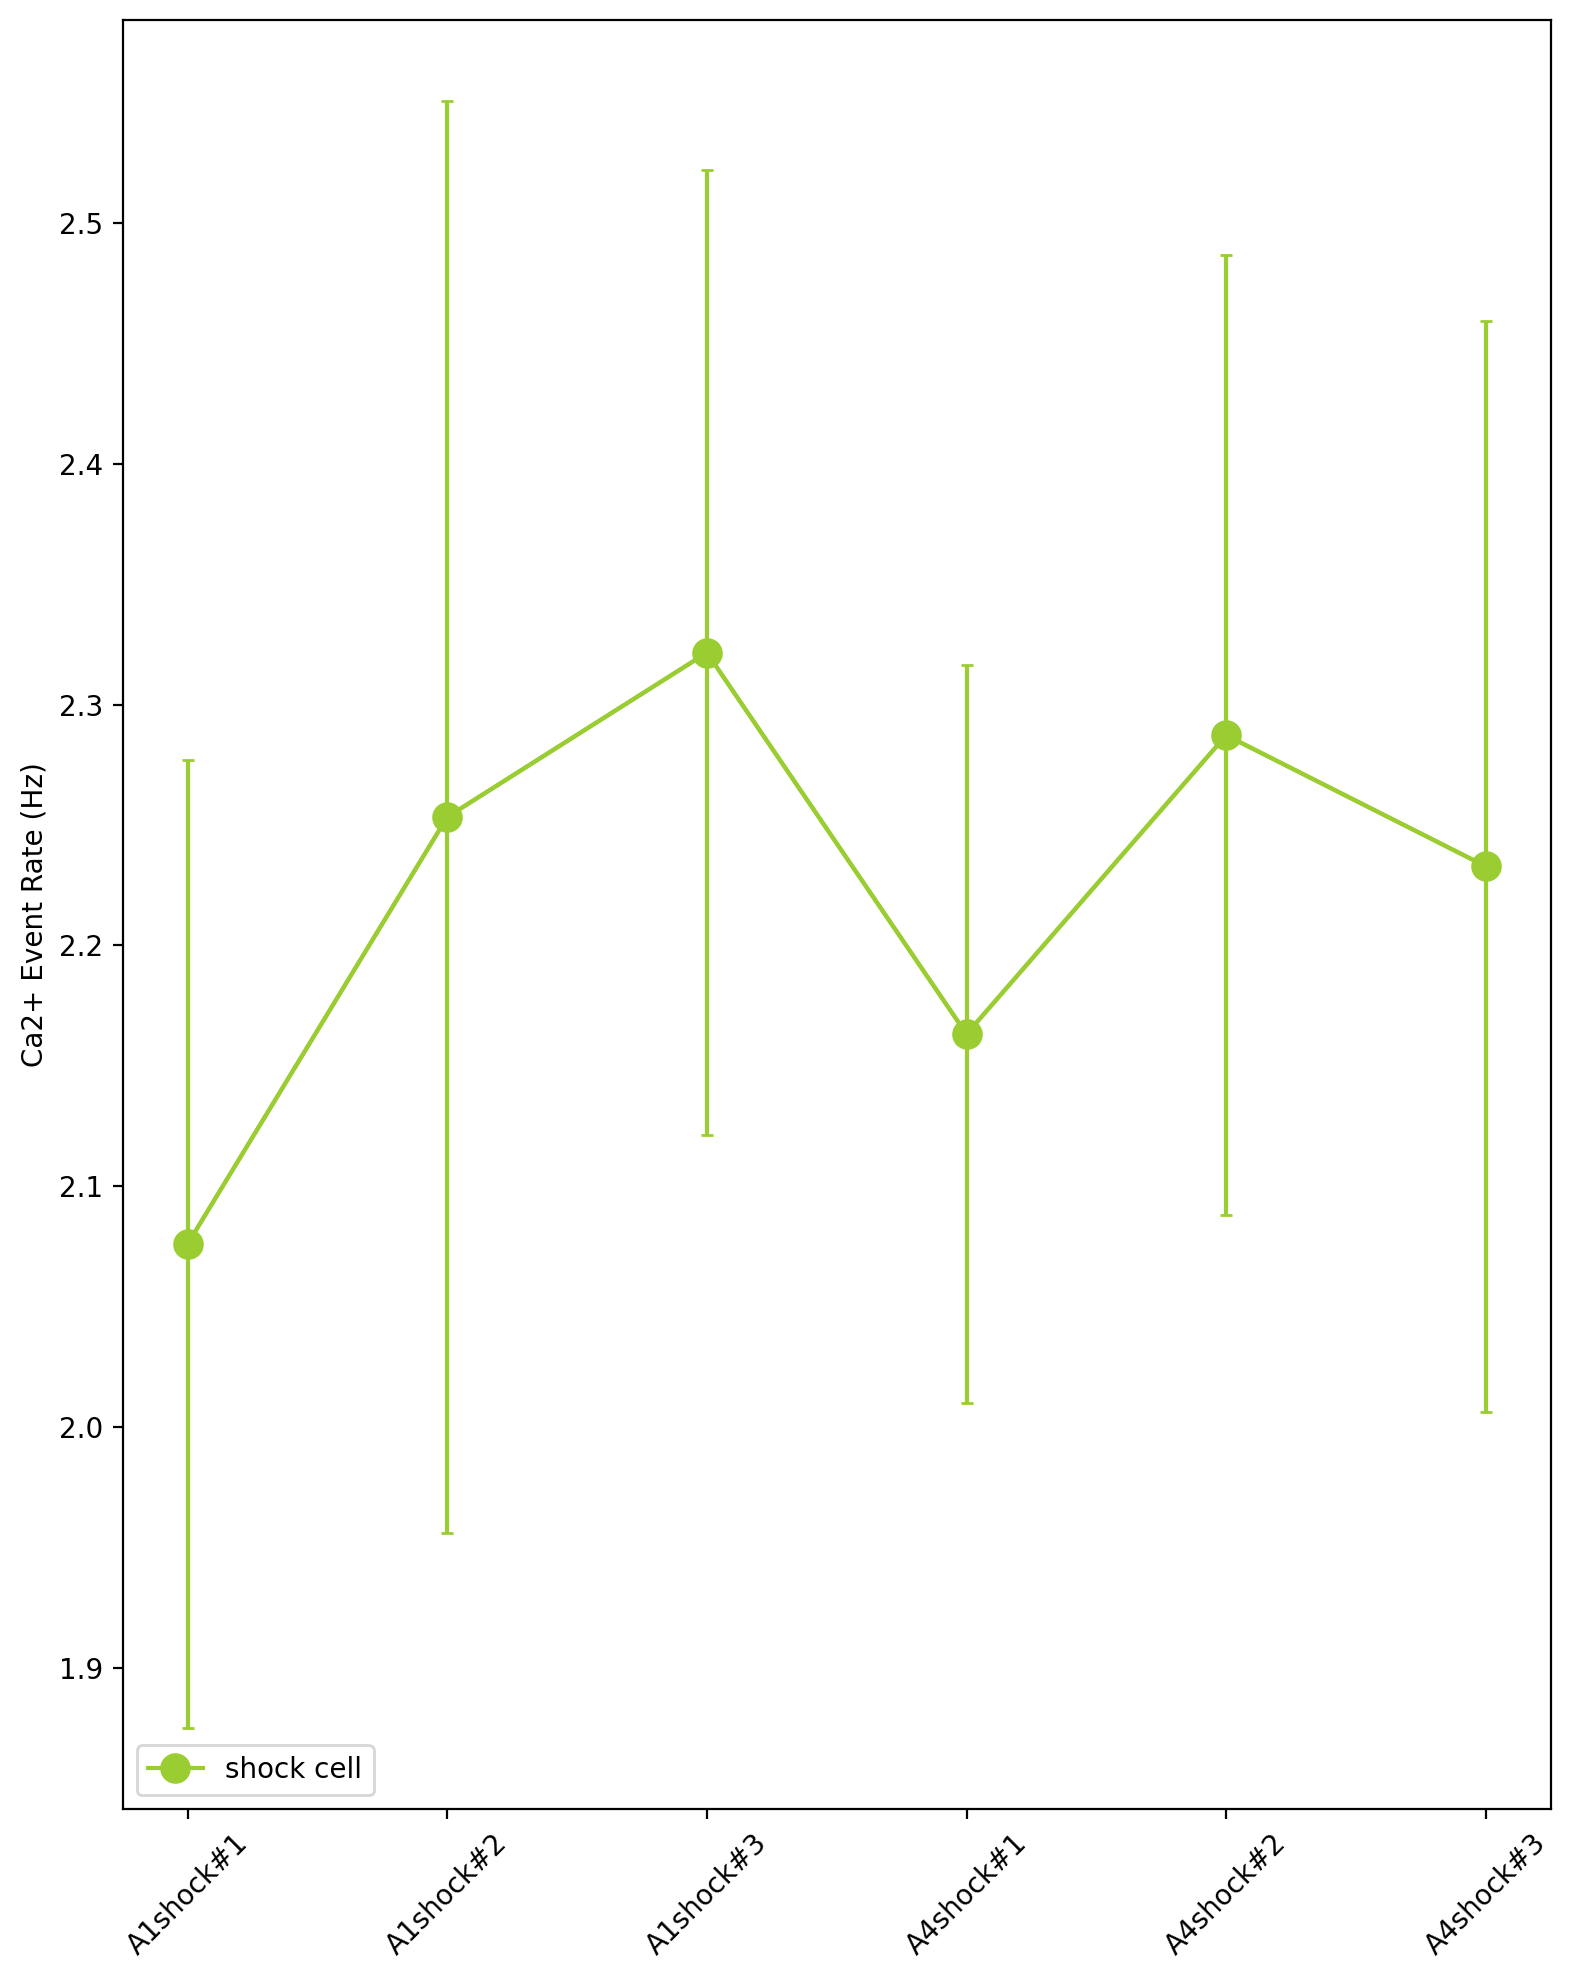

In [12]:
shock_cell_x = event_rate_for_2sd_shock_cells.columns
shock_cell_y = event_rate_for_2sd_shock_cells.mean()
shock_cell_err = event_rate_for_2sd_shock_cells.sem()

fig, ax = plt.subplots(1, figsize=(8, 10), dpi=200, tight_layout=True)

ax.errorbar(shock_cell_x, shock_cell_y, yerr=shock_cell_err, capsize=2, color='yellowgreen')
ax.plot(shock_cell_x, shock_cell_y, marker="o", markersize=8, markeredgewidth=3, label='shock cell', color='yellowgreen')

#ax.set_ylim(0, 2.0)
ax.set_ylabel('Ca2+ Event Rate (Hz)')
ax.legend(loc='lower left')
ax.set_xticklabels(shock_cell_x, rotation=45)

plt.xticks(rotation=45)

plt.show()